In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
euro_file = os.sep.join(["..", "data", "eurpln_d.csv"])
get_full_path = lambda x: os.sep.join(["..", "data", "energy_raw", x])
output_file = os.sep.join(["..", "data", "energy_price.csv"])

In [3]:
datas = sorted(os.listdir(os.sep.join(["..", "data", "energy_raw"])))

In [4]:
df_euro = pd.read_csv(euro_file)

In [5]:
column = ["full_data", "DA", "currency", "empty"]


def set_cols(df):
    df.columns = column
    return df


df = pd.concat(
    [set_cols(pd.read_csv(get_full_path(path))) for path in datas], ignore_index=True
)

df["date"] = df["full_data"].apply(lambda x: "-".join(x[:10].split(".")[::-1]))
# df["date"] = pd.to_datetime(df["date"])
df = df[df["currency"].notna() & df["DA"].notna()]


def to_number(x):
    try:
        return float(x)
    except:
        None


df["price"] = df["DA"].apply(lambda x: to_number(x))


df["price"] = df.apply(
    lambda row: row["price"]
    if row["currency"] == "PLN"
    else df_euro.loc[df_euro["Data"] == row["date"], "Zamkniecie"].values[0]
    * row["price"]
    if df_euro["Data"].isin([row["date"]]).any()
    else None,
    axis=1,
)

df["currency"] = df.apply(
    lambda row: "PLN",
    axis=1,
)
df = df[~df.price.isna()]

df["year"] = df["date"].apply(lambda x: x.split("-")[0])
df["month"] = df["date"].apply(lambda x: x.split("-")[1])
df["day"] = df["date"].apply(lambda x: x.split("-")[2])

df = df[["year", "month", "day", "price"]]
df["unit"] = df.apply(lambda row: "zł/MWh")

In [6]:
df.head()

,year,month,day,price
96,2015,01,05,79.177560
97,2015,01,05,74.678835
98,2015,01,05,74.464610
99,2015,01,05,74.550300
100,2015,01,05,79.691700


<Axes: ylabel='price'>

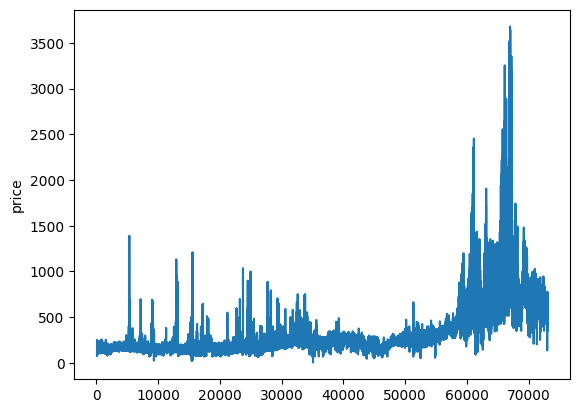

In [9]:
sns.lineplot(df, x=df.index, y="price")

In [8]:
df.to_csv(output_file)